論文とほとんど同じモデル

In [1]:
using DataFrames
using PyPlot

In [2]:
function initialize(N, T, C0, mean_talent, talent_distribution)
    t = [mean_talent for _ = 1:N] + talent_distribution*randn(N)
    for i = 1:N
        if t[i] < 0.0
            t[i] = 0.0
        elseif t[i] > 1.0
            t[i] = 1.0
        end
    end

    init_info_dic = Dict(
        "1:name" => [i for i = 1:N],
        "2:talent" => t,
        "3:meet ruck counter" => [0 for _ = 1:N],
        "4:get ruck counter" => [0 for _ = 1:N],
        "5:unruck counter" => [0 for _ = 1:N],
        "6:capital" => [C0 for _ = 1:N],
        "7:x" => rand(N),
        "8:y" => rand(N),
        "9:r" => [0.0 for _ = 1:N],
    )

    df = DataFrame(init_info_dic)

    hist(df[:,2], bins=Int(floor(sqrt(N))))
    print("histgram of the talent")
    xlabel("talent")
    return df
end

initialize (generic function with 1 method)

In [3]:
function run(df, cross_range, N_E, times)
    ruck_place = rand(N_E,2)
    unruck_place = rand(N_E,2)
    
    I = size(df)[1]
    for t = 1:times
        for p = 1:size(ruck_place)[1]
            x, y = ruck_place[p,:]
            for i = 1:size(df)[1]
                df[i,9] = 0
                df[i,9] += (df[i,7] - x)^2
                df[i,9] += (df[i,8] - y)^2
                df[i,9] = sqrt(df[i,9])
            
                if df[i,9] <= cross_range
                    df[i,3] += 1
                    if rand() <= df[i,2]
                        df[i,4] += 1
                        df[i,6] *= 2
                    end
                end
            end
        end
        for p = 1:size(unruck_place)[1]
            x, y = unruck_place[p,:]
            for i = 1:size(df)[1]
                df[i,9] = 0
                df[i,9] += (df[i,7] - x)^2
                df[i,9] += (df[i,8] - y)^2
                df[i,9] = sqrt(df[i,9])
            
                if df[i,9] <= cross_range
                    df[i,5] += 1
                    df[i,6] /= 2
                end
            end
        end
        
        ruck_place += 0.1*randn(N_E, 2)
        unruck_place += 0.1*randn(N_E, 2)
        for i = 1:size(ruck_place)[1]
            while ruck_place[i] < 0
                ruck_place[i] += 1
            end
            while ruck_place[i] > 1
                ruck_place[i] -= 1
            end
        end
        for i = 1:size(unruck_place)[1]
            while unruck_place[i] < 0
                unruck_place[i] += 1
            end
            while unruck_place[i] > 1
                unruck_place[i] -= 1
            end
        end
    end
end

run (generic function with 1 method)

In [4]:
function histgram_of_the_capital(df, N)
    hist(df[:,6], bins=Int(floor(sqrt(N))))
    print("histgram of the capital")
    xlabel("capital")
    savefig("histgram_of_the_capital.png")
end

function scatter_talent_vs_capital(df)
    scatter(df[:,"2:talent"], df[:,"6:capital"])
    yscale("log")
    xlabel("talent")
    ylabel("capital")
    title("scatter talent vs capital")
    print("scatter talent vs capital")
    savefig("scatter_talent_vs_capital.png")
end

function scatter_capital_vs_mean_talent_at_the_capital(df)
    sort!(df, [:"6:capital"])
    mean_talent_in_the_capital_lst = []
    capital_lst = []
    mean_talent, current_capital, counter = 0, 0, 0
    for i = 1:size(df)[1]
        if df[i,6] == current_capital
            mean_talent += df[i,2]
            counter += 1
        else
            if i != 1
                mean_talent /= counter
                push!(mean_talent_in_the_capital_lst, mean_talent)
                push!(capital_lst, current_capital)
            end
            mean_talent = df[i,2]
            current_capital = df[i,6]
            counter = 1
        end
    end
    mean_talent /= counter
    push!(mean_talent_in_the_capital_lst, mean_talent)
    push!(capital_lst, current_capital)
    
    scatter(capital_lst, mean_talent_in_the_capital_lst)
    xscale("log")
    xlabel("capital")
    ylabel("mean talent at the capital")
    title("capital vs mean talent at the capital")
    print("capital vs mean talent at the capital")
    savefig("scatter_capital_vs_mean_talent_at_the_capital.png")
end

function capital_vs_mean_number_of_rucky_event(df)
    sort!(df, [:"6:capital"])
    mean_number_of_ruck_event_at_the_capital_lst = []
    capital_lst = []
    mean_number_of_ruck_event, current_capital, counter = 0, 0, 0
    for i = 1:size(df)[1]
        if df[i,6] == current_capital
            mean_number_of_ruck_event += df[i,3]
            counter += 1
        else
            if i != 1
                mean_number_of_ruck_event /= counter
                push!(mean_number_of_ruck_event_at_the_capital_lst, mean_number_of_ruck_event)
                push!(capital_lst, current_capital)
            end
            mean_number_of_ruck_event = df[i,3]
            current_capital = df[i,6]
            counter = 1
        end
    end
    mean_number_of_ruck_event /= counter
    push!(mean_number_of_ruck_event_at_the_capital_lst, mean_number_of_ruck_event)
    push!(capital_lst, current_capital)
    
    scatter(capital_lst, mean_number_of_ruck_event_at_the_capital_lst)
    xscale("log")
    xlabel("capital")
    ylabel("mean number of ruck event at the capital")
    title("capital vs mean number of ruck event at the capital")
    print("capital vs mean number of ruck event at the capital")
    savefig("scatter_capital_vs_mean_number_of_ruck_event_at_the_capital.png")
end

function capital_vs_mean_number_of_unrucky_event(df)
    sort!(df, [:"6:capital"])
    mean_number_of_unruck_event_at_the_capital_lst = []
    capital_lst = []
    mean_number_of_unruck_event, current_capital, counter = 0, 0, 0
    for i = 1:size(df)[1]
        if df[i,6] == current_capital
            mean_number_of_unruck_event += df[i,5]
            counter += 1
        else
            if i != 1
                mean_number_of_unruck_event /= counter
                push!(mean_number_of_unruck_event_at_the_capital_lst, mean_number_of_unruck_event)
                push!(capital_lst, current_capital)
            end
            mean_number_of_unruck_event = df[i,5]
            current_capital = df[i,6]
            counter = 1
        end
    end
    mean_number_of_unruck_event /= counter
    push!(mean_number_of_unruck_event_at_the_capital_lst, mean_number_of_unruck_event)
    push!(capital_lst, current_capital)
    
    scatter(capital_lst, mean_number_of_unruck_event_at_the_capital_lst)
    xscale("log")
    xlabel("capital")
    ylabel("mean number of unruck event at the capital")
    title("capital vs mean number of unruck event at the capital")
    print("capital vs mean number of unruck event at the capital")
    savefig("scatter_capital_vs_mean_number_of_unruck_event_at_the_capital.png")
end

capital_vs_mean_number_of_unrucky_event (generic function with 1 method)

条件１

histgram of the talent

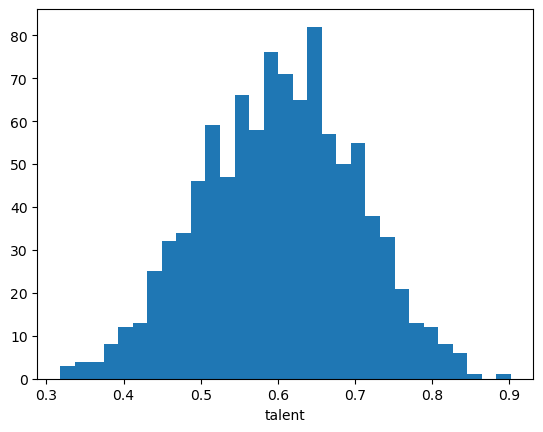

In [5]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.005
mean_talent = 0.6
talent_distribution = 0.1

df = initialize(N, T, C0, mean_talent, talent_distribution)
run(df, cross_range, N_E, T)

histgram of the capital

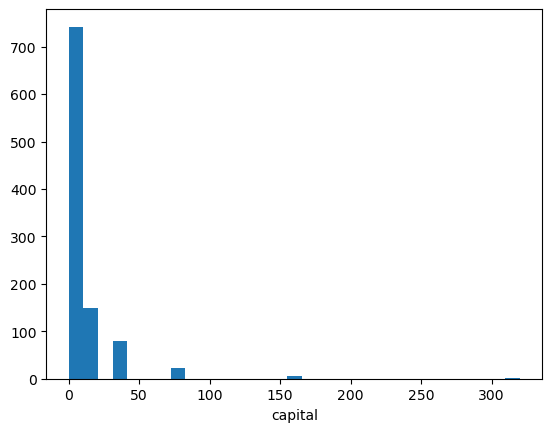

In [6]:
histgram_of_the_capital(df, N)

scatter talent vs capital

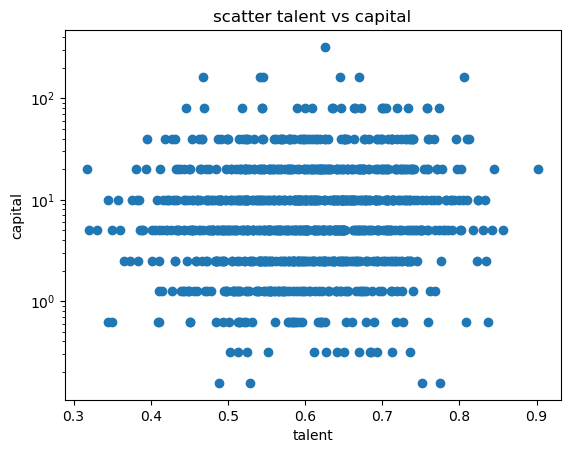

In [7]:
scatter_talent_vs_capital(df)

capital vs mean talent at the capital

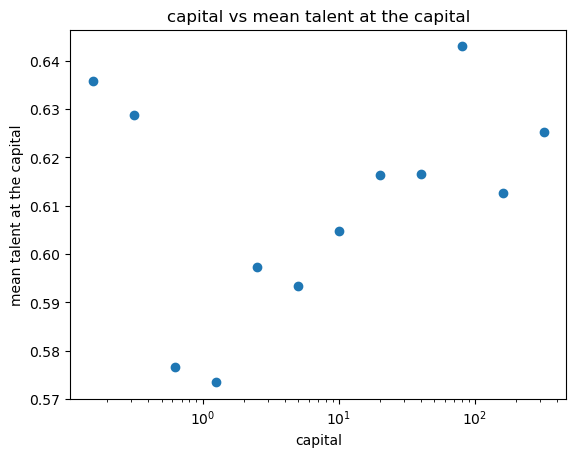

In [8]:
scatter_capital_vs_mean_talent_at_the_capital(df)

capital vs mean number of ruck event at the capital

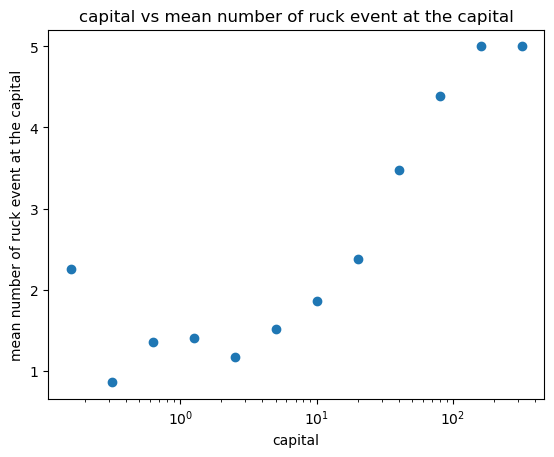

In [9]:
capital_vs_mean_number_of_rucky_event(df)

capital vs mean number of unruck event at the capital

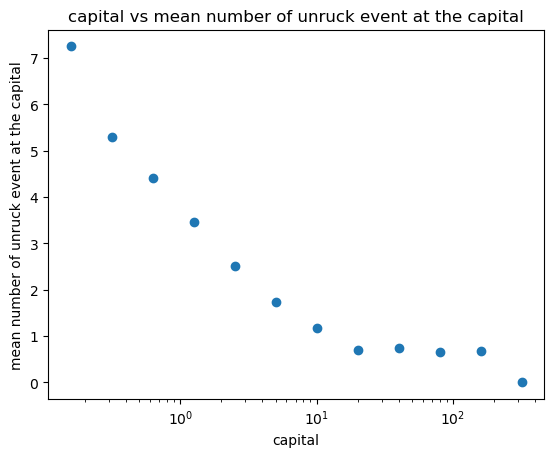

In [10]:
capital_vs_mean_number_of_unrucky_event(df)

条件２

histgram of the talent

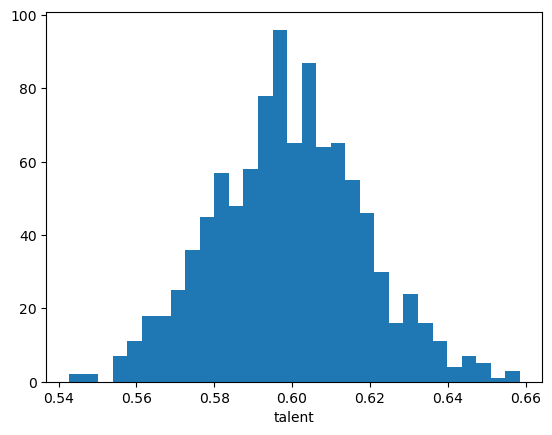

In [11]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.005
mean_talent = 0.6
talent_distribution = 0.02

df2 = initialize(N, T, C0, mean_talent, talent_distribution)
run(df2, cross_range, N_E, T)

histgram of the capital

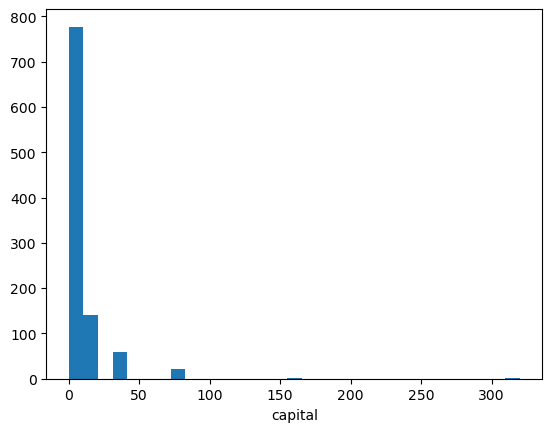

In [12]:
histgram_of_the_capital(df2, N)

scatter talent vs capital

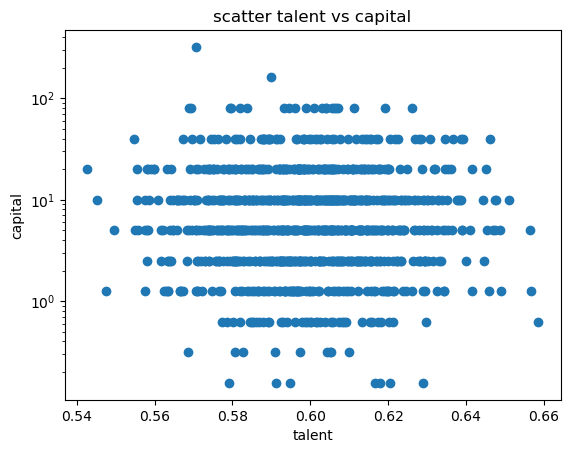

In [13]:
scatter_talent_vs_capital(df2)

capital vs mean talent at the capital

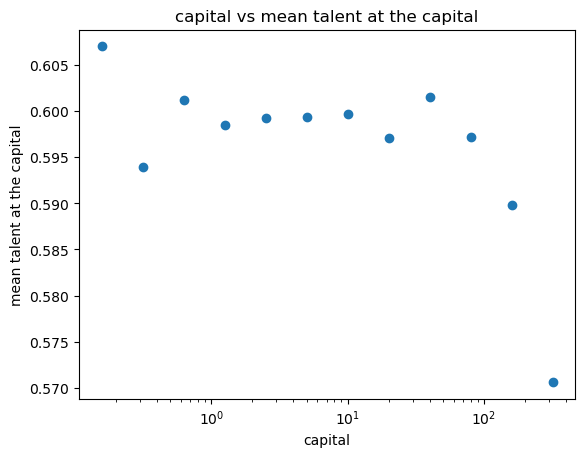

In [14]:
scatter_capital_vs_mean_talent_at_the_capital(df2)

capital vs mean number of ruck event at the capital

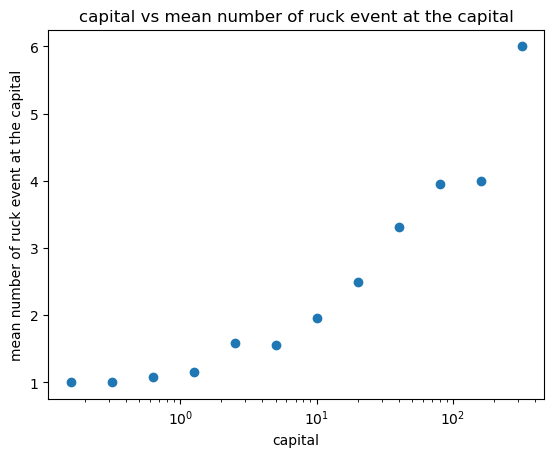

In [15]:
capital_vs_mean_number_of_rucky_event(df2)

capital vs mean number of unruck event at the capital

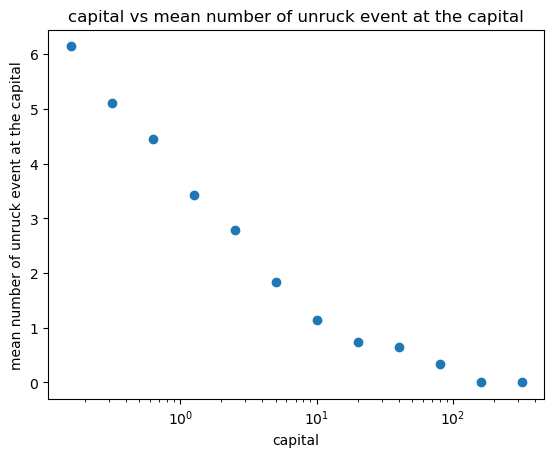

In [16]:
capital_vs_mean_number_of_unrucky_event(df2)

条件３

histgram of the talent

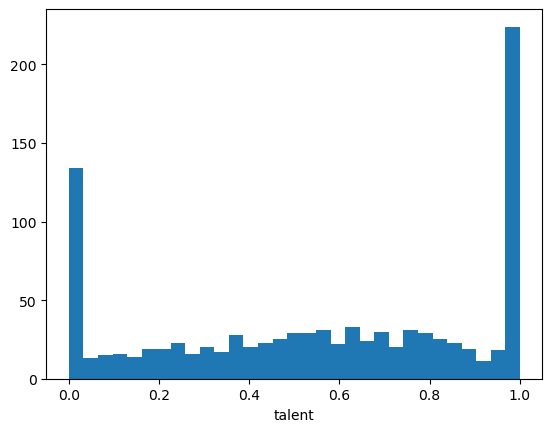

In [17]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.005
mean_talent = 0.6
talent_distribution = 0.5

df3 = initialize(N, T, C0, mean_talent, talent_distribution)
run(df3, cross_range, N_E, T)

histgram of the capital

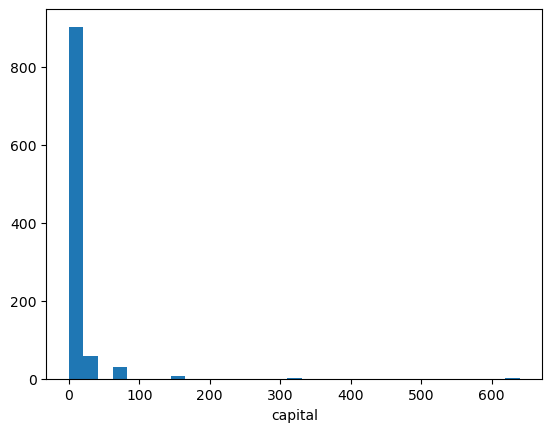

In [18]:
histgram_of_the_capital(df3, N)

scatter talent vs capital

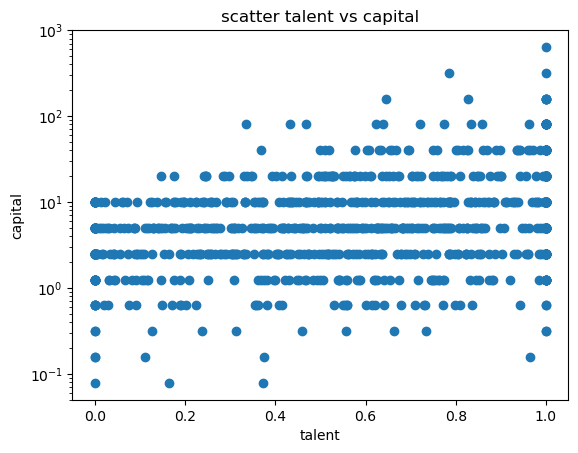

In [19]:
scatter_talent_vs_capital(df3)

capital vs mean talent at the capital

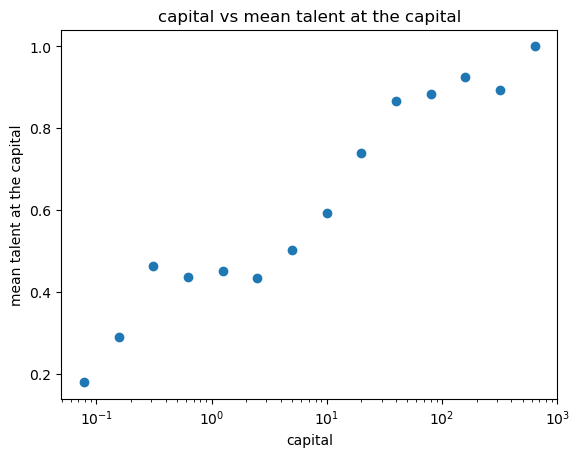

In [20]:
scatter_capital_vs_mean_talent_at_the_capital(df3)

capital vs mean number of ruck event at the capital

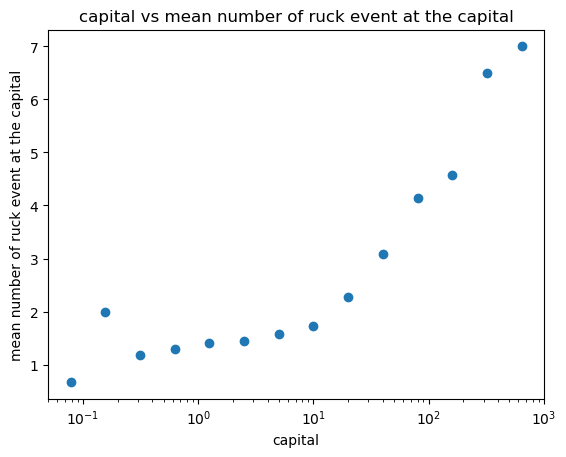

In [21]:
capital_vs_mean_number_of_rucky_event(df3)

capital vs mean number of unruck event at the capital

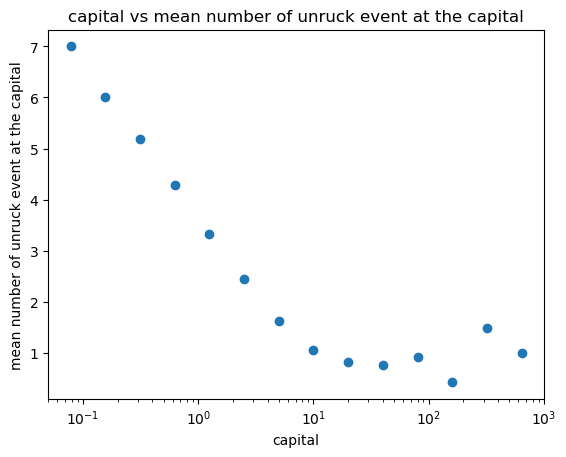

In [22]:
capital_vs_mean_number_of_unrucky_event(df3)

条件４

histgram of the talent

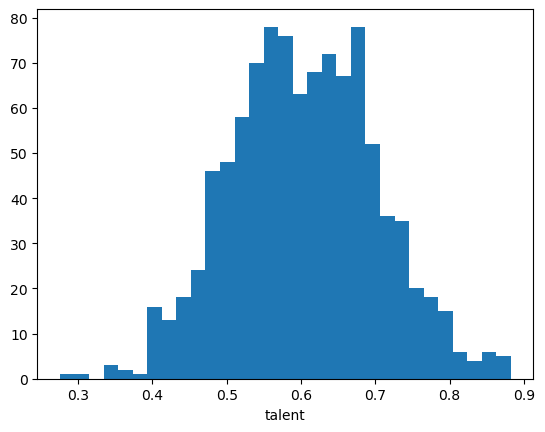

In [23]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.001
mean_talent = 0.6
talent_distribution = 0.1

df4 = initialize(N, T, C0, mean_talent, talent_distribution)
run(df4, cross_range, N_E, T)

histgram of the capital

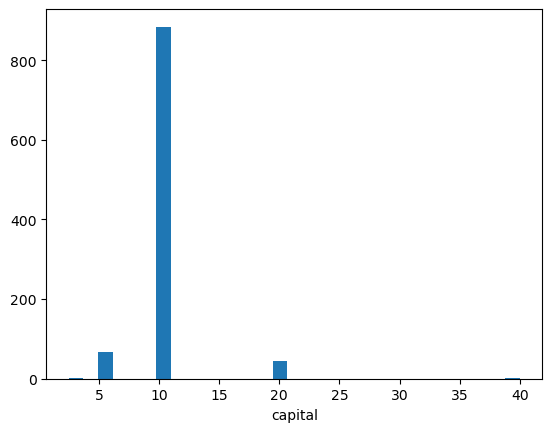

In [24]:
histgram_of_the_capital(df4, N)

scatter talent vs capital

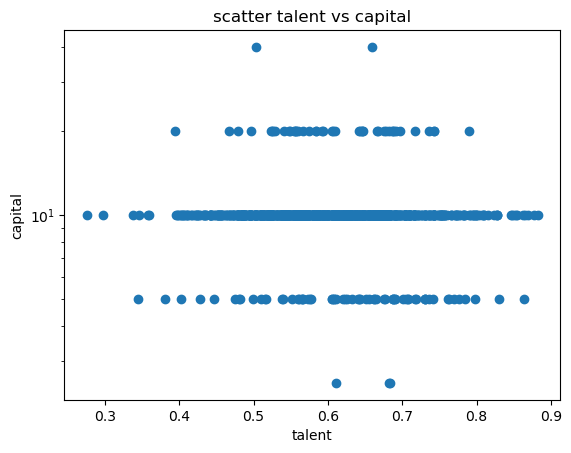

In [25]:
scatter_talent_vs_capital(df4)

capital vs mean talent at the capital

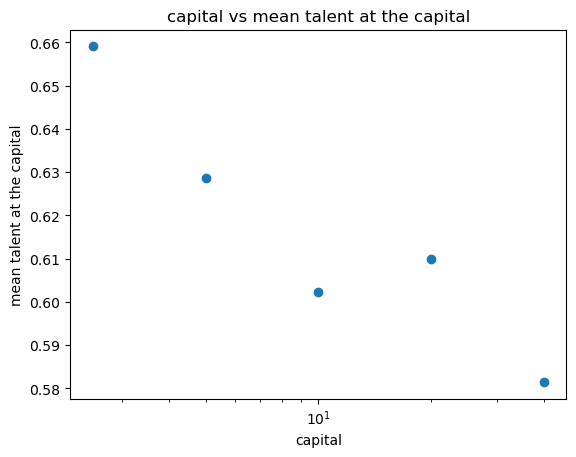

In [26]:
scatter_capital_vs_mean_talent_at_the_capital(df4)

capital vs mean number of ruck event at the capital

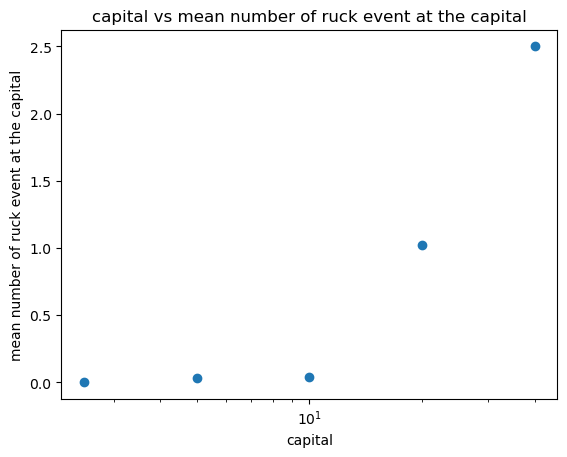

In [27]:
capital_vs_mean_number_of_rucky_event(df4)

capital vs mean number of unruck event at the capital

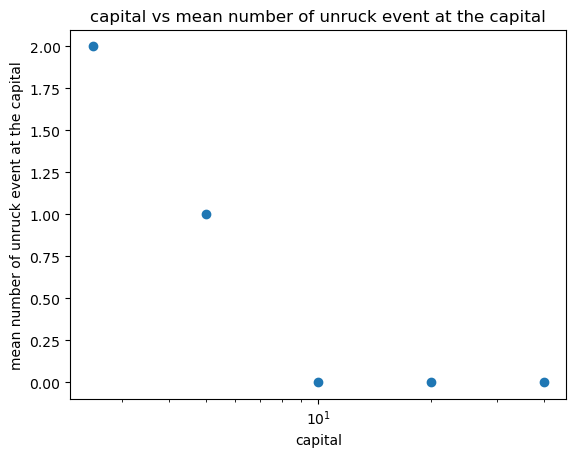

In [28]:
capital_vs_mean_number_of_unrucky_event(df4)

In [29]:
# 条件５

histgram of the talent

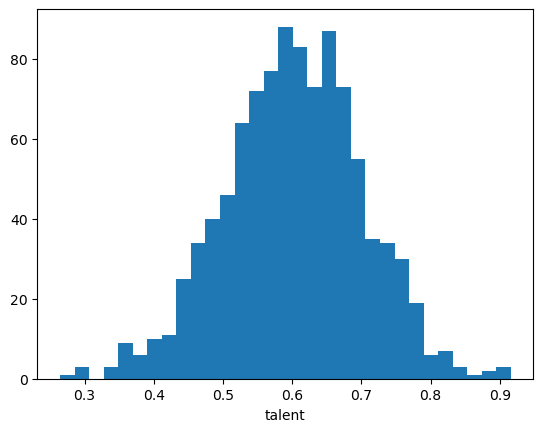

In [30]:
N = 10^3
T = 80
C0 = 10.0
N_E = Int(N // 2)
cross_range = 0.05
mean_talent = 0.6
talent_distribution = 0.1

df5 = initialize(N, T, C0, mean_talent, talent_distribution)
run(df5, cross_range, N_E, T)

histgram of the capital

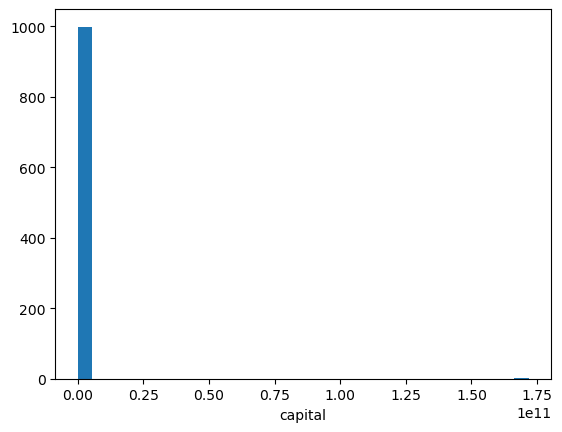

In [31]:
histgram_of_the_capital(df5, N)

scatter talent vs capital

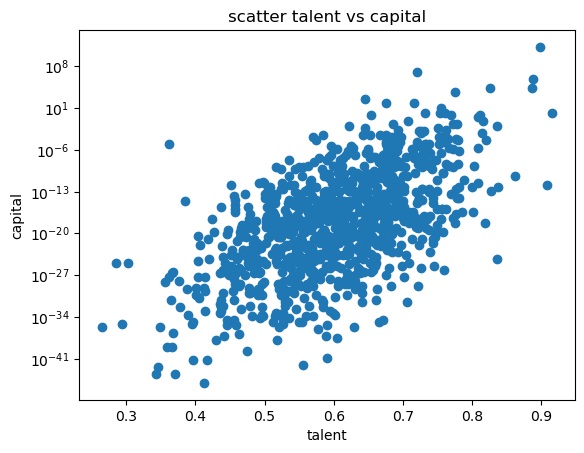

In [32]:
scatter_talent_vs_capital(df5)

capital vs mean talent at the capital

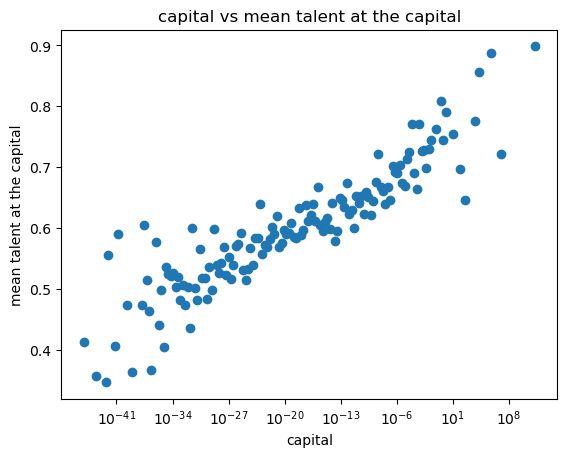

In [33]:
scatter_capital_vs_mean_talent_at_the_capital(df5)

capital vs mean number of ruck event at the capital

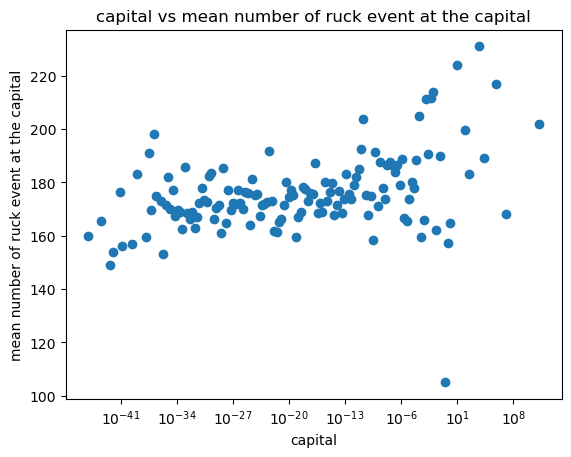

In [34]:
capital_vs_mean_number_of_rucky_event(df5)

capital vs mean number of unruck event at the capital

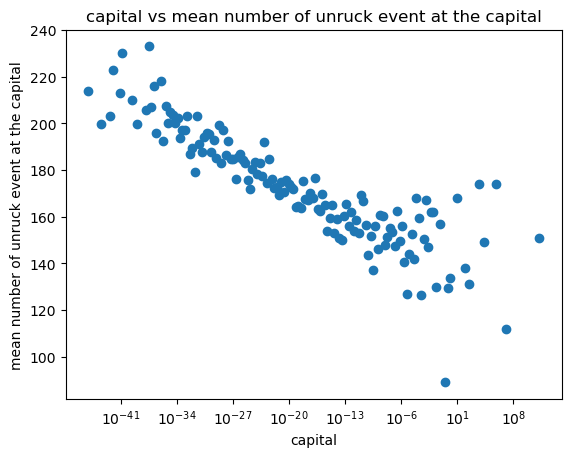

In [35]:
capital_vs_mean_number_of_unrucky_event(df5)